In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

datos = np.loadtxt('tiempos.txt', skiprows=1)

datos = datos[:,1:]  # Soleado | Nublado | Lluvia
datos[6,2] = 18.9    # Corregimos dato mal ingresado.
print (datos)

I_SOLEADO, I_NUBLADO, I_LLUVIA = range(3)

[[ 11.1  11.3  19.4]
 [ 13.   12.8  18.2]
 [ 16.1  16.   19. ]
 [ 14.5  14.1  18.9]
 [ 12.   12.5  19.1]
 [ 11.   11.6  18.7]
 [ 15.1  14.6  18.9]
 [ 14.4  14.2  19.9]
 [ 16.1  16.1  18.5]
 [ 17.   16.7  19.2]
 [ 12.2  12.4  18.8]
 [ 14.4  14.1  19.2]]


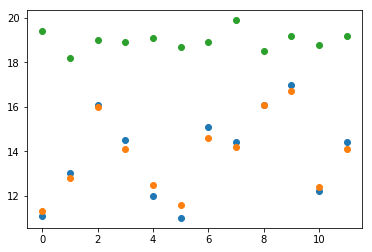

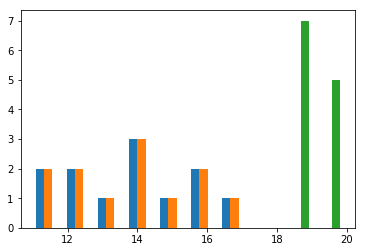

In [6]:
plt.plot(datos, 'o')
plt.show()

plt.hist(datos)
plt.show()

### Test de t
Los datos vienen de forma |Soleado|Nublado|Lluvia|

- Los atletas son más lentos en dı́as de lluvia que en dı́as soleados.

Primer Test.
Suponemos como hipótesis nula que los tiempos de los atletas tienen menor o igual media si está Lluvioso que si está Soleado

In [7]:
stat, pval = stats.ttest_rel(datos[:,I_SOLEADO], datos[:,I_LLUVIA], )  
stat, pval/2

(-8.576227572594302, 1.6758255803609023e-06)

Como el p-valor es muy pequeño y el estadístico es negativo, parecería haber evidencia suficiente para rechazar la hipótesis nula. Con una gran confianza podemos afirmar que los atletas en días soleados corren más rápido que en días lluviosos

- El cielo nublado no influye en los tiempos de los atletas.

Asumimos que la afirmación se refiere a la comparación con días soleados. Por lo tanto, vamos a comparar los tiempos de los atletas para días soleados y para días nublados usando el mismo test anterior.

Nuestra hipótesis nula en este caso será que el cielo nublado no influye en los tiempos de los atletas. Bajo esa hipótesis, el t-estadístico tendría distribución t-student.

In [8]:
stat, pval = stats.ttest_rel(datos[:,I_SOLEADO], datos[:,I_NUBLADO], )  
stat, pval/2

(0.41213824986058739, 0.3440778057802279)

Al tener un p-valor relativamente grande, no podemos descartar la hipótesis nula. Aunque tampoco podemos afirmar que el estado del cielo no tenga influcencia sobre los tiempos de los atletas.

- La velocidad en dı́as de lluvia es independiente del atleta.

Nuestra intuición nos decía que esta hipótesis podía testearse analizando la varianza de la muestra en días de lluvia y concluir, de ser muy baja, que los tiempos son independientes. Sin embargo, resultó errada: una carrera de horas en donde todos los atletas llegan con segundos de diferencia tendría una varianza bajísima, pero eso no da información sobre la independencia entre los tiempos y los atletas.

En su lugar, decidimos intentar un test de correlación entre los tiempos de los atletas en días soleados y de lluvia. Si la velocidad en días de lluvia es independiente del atleta, esperamos ver baja correlación.

Para esto estamos usando una hipótesis extra, que es que la velocidad en días soleados sí depende del atleta. Para darle mayor solidez a nuestro test, calcularemos también la correlación entre días soleados y días nublados. Esperamos ver que esta correlación sea mucho más fuerte que la anterior, resaltando la diferencia específica entre los días de lluvia y los días sin lluvia.

In [9]:
r, p = stats.pearsonr(datos[:,I_SOLEADO], datos[:,I_LLUVIA])
r, p

(0.052589320614219302, 0.87105701717912176)

In [10]:
r, p = stats.pearsonr(datos[:,I_SOLEADO], datos[:,I_NUBLADO])
r, p

(0.99082377675574329, 5.0456463998066068e-10)

Vemos que la correlación entre el atletas y sus velocidades en días de sol y en días con lluvia es baja. Por el contrario, la correlación es fuerte entre los dos tipos de días sin lluvia. Podemos concluir a raíz de esto que la velocidad en días de lluvia pareciera ser independiente del atleta, aunque más muestras harían falta para darle más fuerza a la hipótesis.